In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing required libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt    #for plotting
import seaborn as sns              #for data visualisation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   #for data transformation
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler        #to normalise/scale the dataset 

from sklearn.model_selection import cross_val_score


In [ ]:
#LOADING THE DATASET 

df= pd.read_csv("/content/drive/MyDrive/ML/Data/Mini Projects/DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#CHECKING FOR ANY NULL VALUES
special_char=['!','@',"$",'%','^','&',"*","(",')','-',"<",'>','?','/',':',';',',']
df.replace(special_char, np.nan, inplace=True)

df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
#IMPUTATION

df["Item_Outlet_Sales"]= df["Item_Outlet_Sales"].fillna(df["Item_Outlet_Sales"].mean())
if df["Item_Outlet_Sales"].isnull().sum() == 0:
  print("No null values exhibits in dataset. We can proceed further.")

No null values exhibits in dataset. We can proceed further.


In [ ]:
#DATA TRANSFORMATION -transforming object datatypes to category and then numerical 

lb=LabelEncoder()
for i in df.columns:
  if df[i].dtypes=="object":
    df[i]=df[i].astype("category")
    df[i]=lb.fit_transform(df[i])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


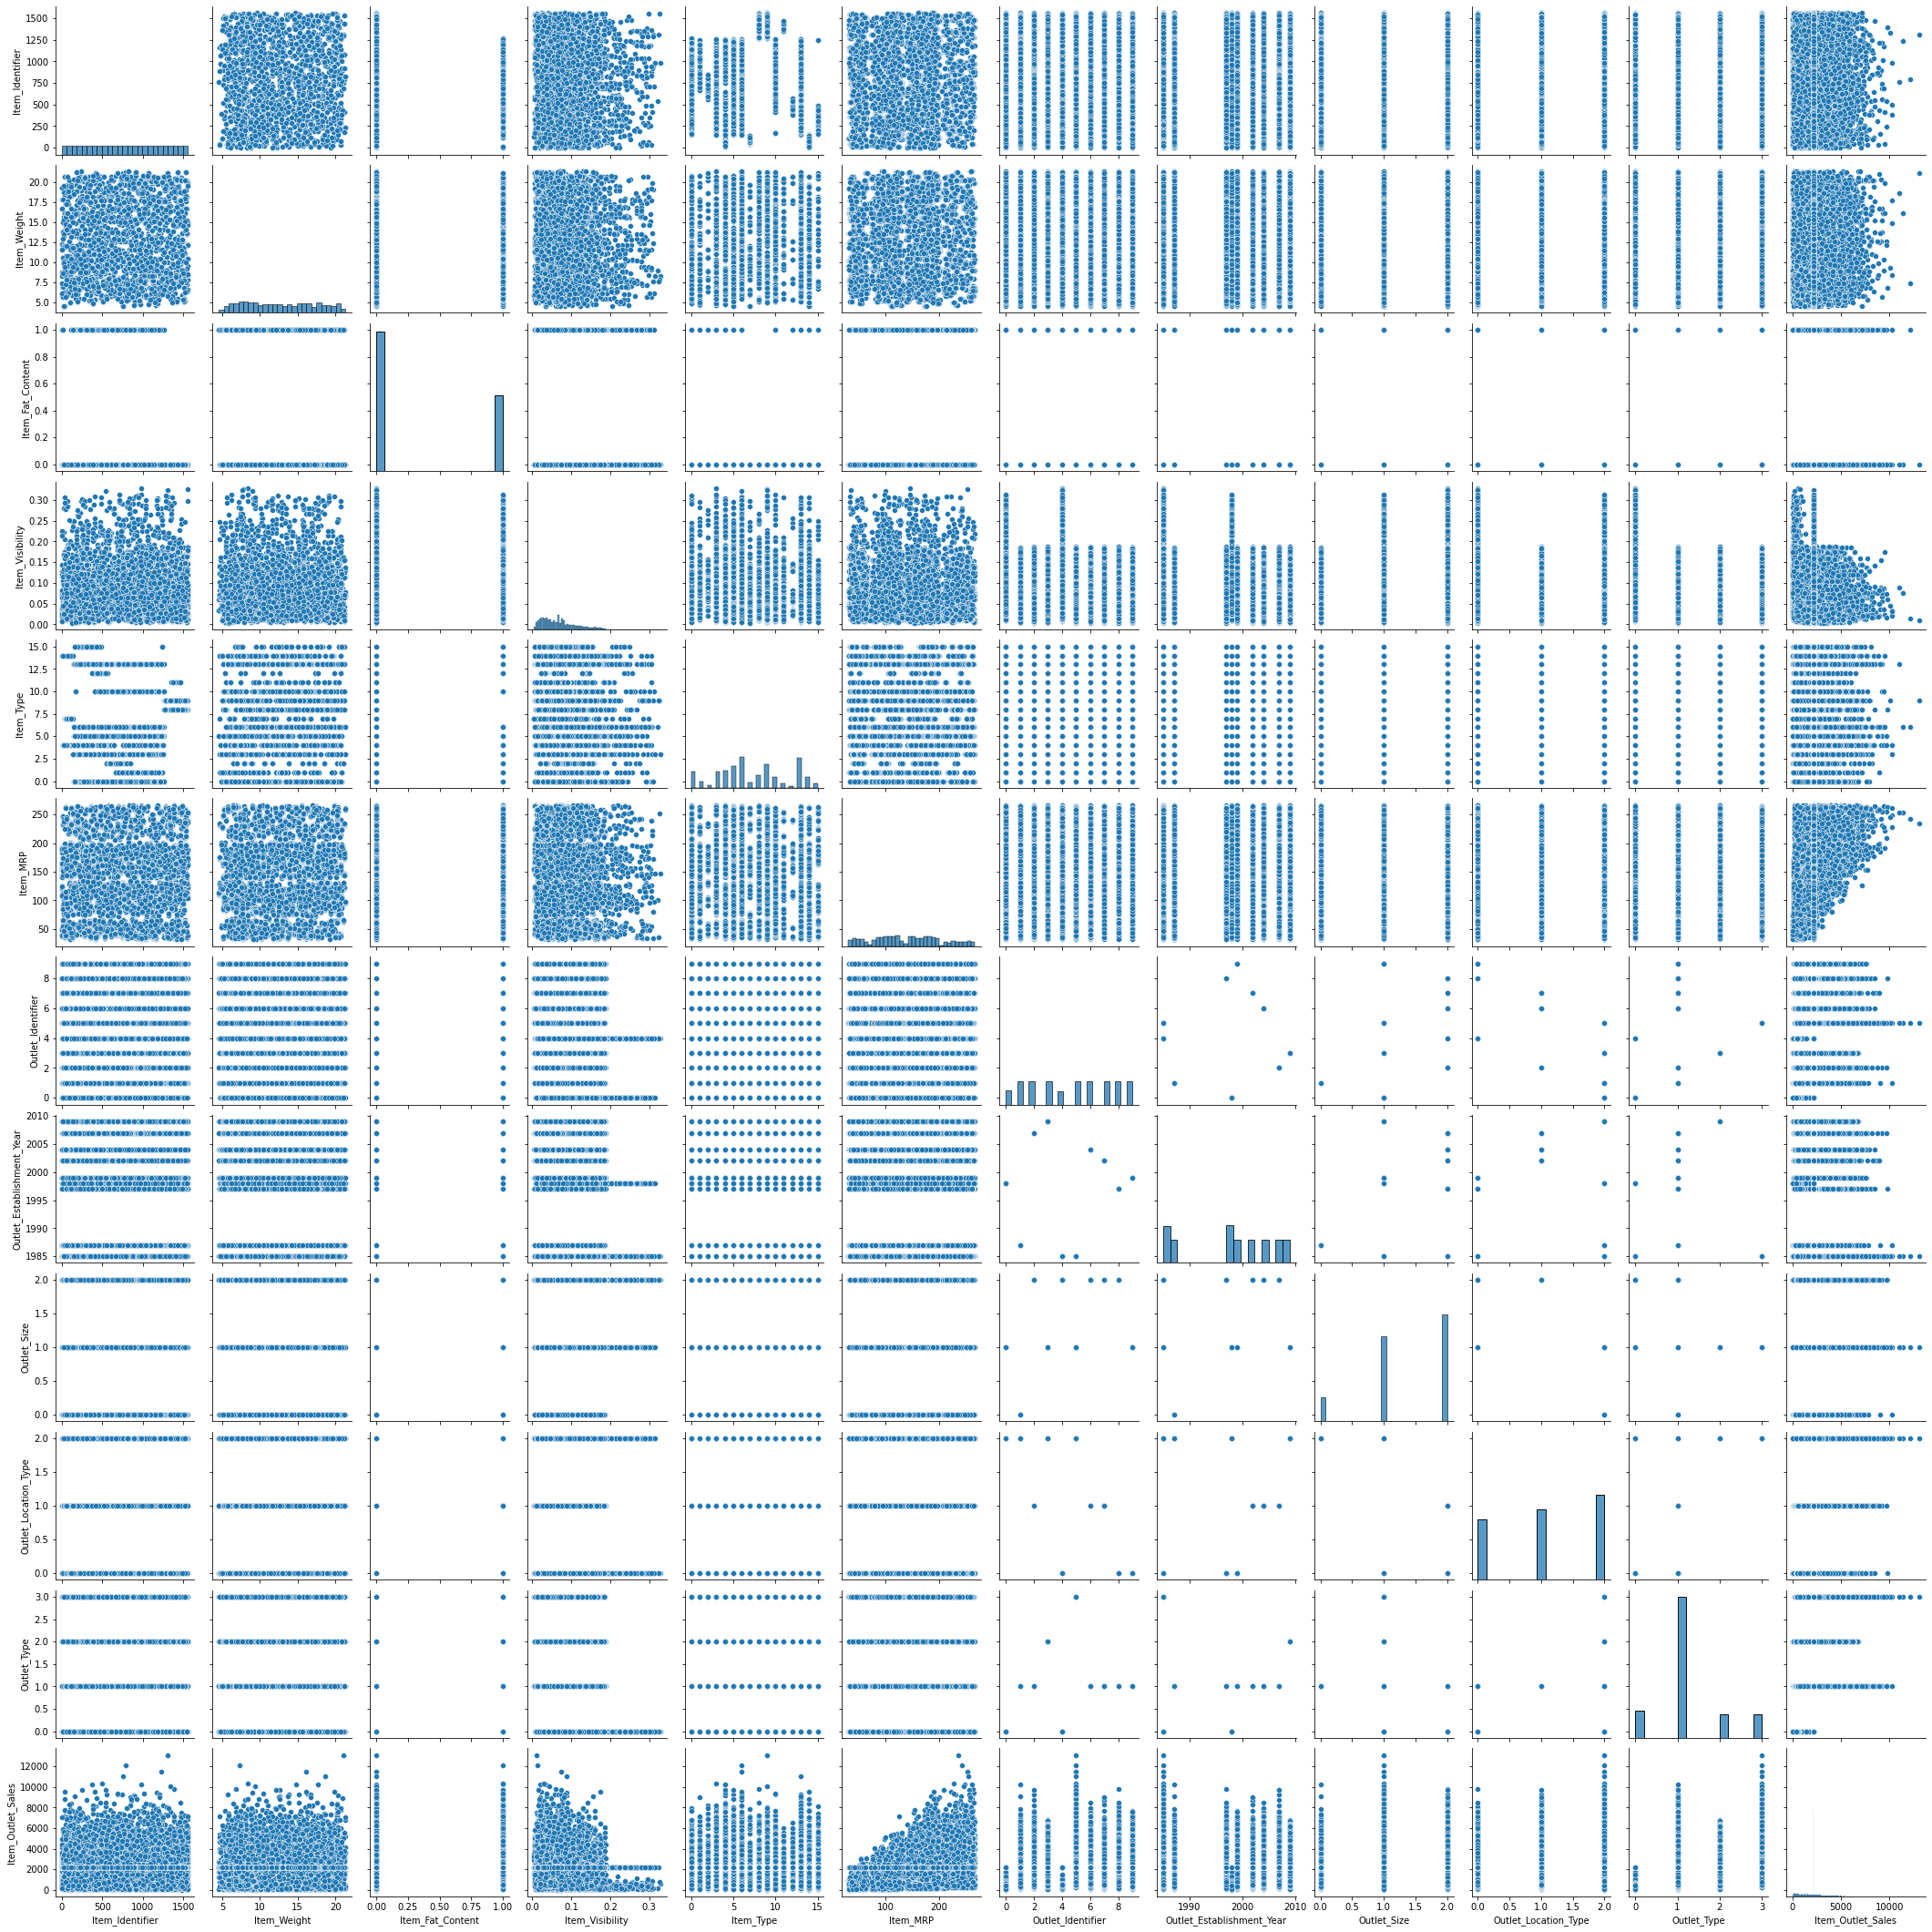

In [ ]:
sns.pairplot(df)
plt.show()

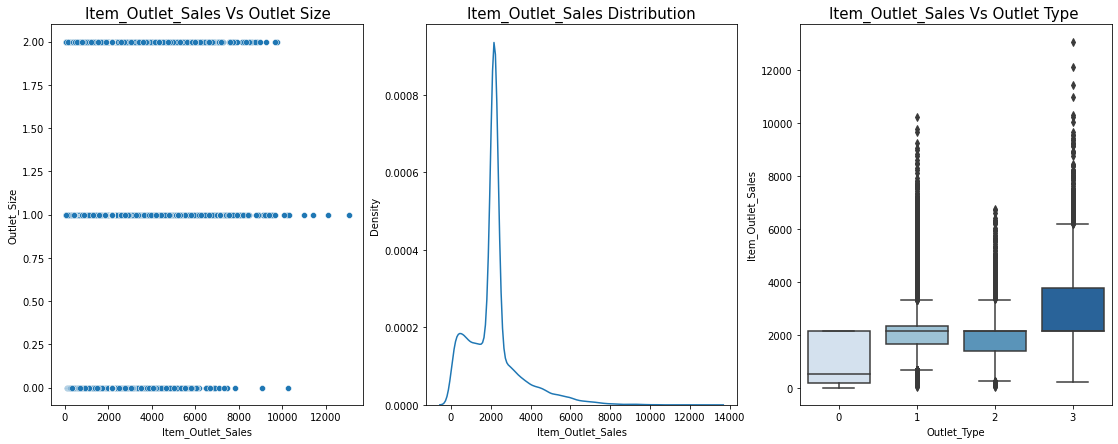

In [ ]:
#DATA VISUALISATION
import warnings
warnings.filterwarnings("ignore")
figure, ax = plt.subplots(1,3, figsize = (19,7))
sns.scatterplot(df["Item_Outlet_Sales"], y= df["Outlet_Size"], palette="Blues", ax=ax[0])
sns.kdeplot(df["Item_Outlet_Sales"], palette="Blues", ax=ax[1])
sns.boxplot( x=df["Outlet_Type"],y=df["Item_Outlet_Sales"],  palette="Blues", ax=ax[2])

ax[0].set_title("Item_Outlet_Sales Vs Outlet Size", fontsize= 15)
ax[1].set_title("Item_Outlet_Sales Distribution", fontsize= 15)
ax[2].set_title("Item_Outlet_Sales Vs Outlet Type ", fontsize= 15)
plt.show()

**INTERPRETATION - Outlet Size 1 has the highest sales.**

**Max number of sales belongs to the range of 2000-2500$.**

**Outlet type 3 has the highest sales among all the outlet types.**

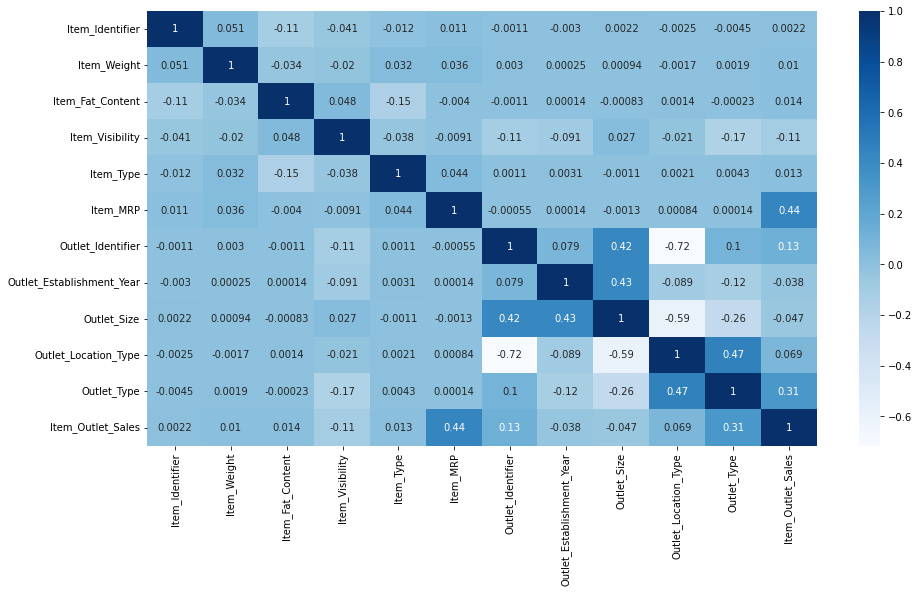

In [ ]:
#CORRELLATION MATRIX 
plt.figure(figsize=(15,8))
sns.heatmap((df.corr()), cmap="Blues", annot=True)
plt.show()

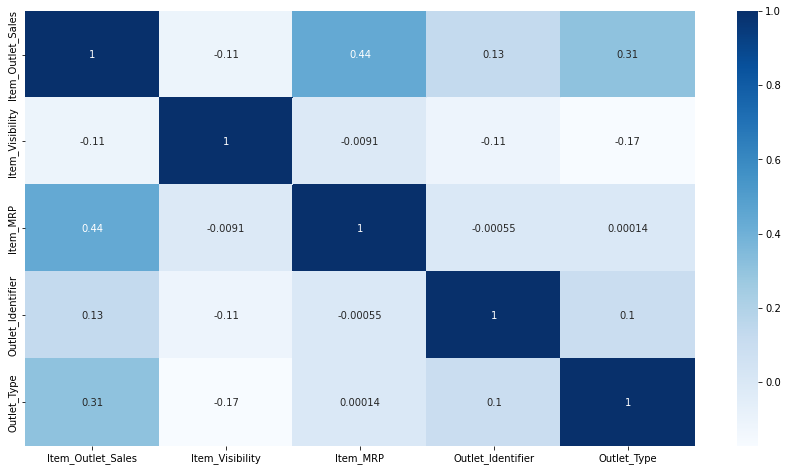

In [ ]:
#FEATURES HAVING CORRELATION VALUE WITH TARGET FEATURE : Item_Outlet_Sales

Sel_features = ["Item_Outlet_Sales", "Item_Visibility"		,"Item_MRP",	"Outlet_Identifier" ,"Outlet_Type"]    
df1=df[Sel_features]

plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), cmap="Blues", annot=True)
plt.show()

In [ ]:
#DATA SPLITTING

X=np.array(df1.iloc[:, 1:])
y=np.array(df1.iloc[:,0])

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)


In [ ]:
#MODELLING AND EVALUATION 

model= LinearRegression().fit(X_train, y_train)     #USING LINEAR REGRESSION MODEL
y_pred= model.predict(X_test)

print("Coefficient of Determination: " , model.score(X_train, y_train))
print("Slope : ", model.coef_)
print("Intercept : ", model.intercept_)

MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print("\n\nMSE : ",(MSE),  "\nMAE : ",(MAE),      "\nRMSE : ", (RMSE))

Coefficient of Determination:  0.3037476726946896
Slope :  [-1271.12943445     9.55968074    42.98836219   469.39126529]
Intercept :  156.08023602601133


MSE :  1199190.2285796478 
MAE :  820.6092567090145 
RMSE :  1095.0754442410112


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor().fit(X_train, y_train)     #USING DECISSION TREE REGRESSION MODEL
y_pred= model.predict(X_test)


MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print("\n\nMSE : ",(MSE),   "\nMAE : ",(MAE),       "\nRMSE : ", (RMSE))



MSE :  2310547.608391605 
MAE :  1055.705595222357 
RMSE :  1520.0485546164653


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor().fit(X_train, y_train)     #USING RANDOM FOREST REGRESSION MODEL
y_pred= model.predict(X_test)


MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print("\n\nMSE : ",(MSE) ,   "\nMAE : ",(MAE),       "\nRMSE : ", (RMSE))



MSE :  1296328.4333932817 
MAE :  855.0474288299296 
RMSE :  1138.564198187033


In [ ]:
#USING CROSS VALIDATION TECHNIQUE TO SELECT THE BEST MODEL 

print("Linear Regression Model Scores = ",cross_val_score(LinearRegression(),X_train, y_train, cv=3))
print("Decison Tree Model Scores = ",cross_val_score(DecisionTreeRegressor(),X_train, y_train, cv=3))
print("Random Forest Model Scores = ",cross_val_score(RandomForestRegressor(),X_train, y_train, cv=3))

Linear Regression Model Scores =  [0.32188605 0.30007486 0.28326821]
Decison Tree Model Scores =  [-0.33837792 -0.33876436 -0.37637485]
Random Forest Model Scores =  [0.2587935 0.2703283 0.2308673]


In [ ]:
y_pred      #prediction of sales through linear regression model

array([3039.49249595, 3383.92570494, 2835.36592229, ..., 1182.65980257,
       2058.01524755, 1865.60799597])

**CONCLUSION : Here we find that Linear Regression model is best fit model having the highest accuracy from all of the above model.**

In [ ]:
X

array([[1.60473010e-02, 2.49809200e+02, 9.00000000e+00, 1.00000000e+00],
       [1.92782160e-02, 4.82692000e+01, 3.00000000e+00, 2.00000000e+00],
       [1.67600750e-02, 1.41618000e+02, 9.00000000e+00, 1.00000000e+00],
       ...,
       [7.35285610e-02, 1.18744000e+02, 7.00000000e+00, 1.00000000e+00],
       [6.47088300e-02, 2.14621800e+02, 2.00000000e+00, 1.00000000e+00],
       [1.04720151e-01, 7.97960000e+01, 7.00000000e+00, 1.00000000e+00]])